In [1]:
from sklearn.cluster import KMeans
import numpy as np

In [2]:
import pandas as pd

In [3]:
!ls Players_Weekwise/

week_1.csv  week_16.csv week_22.csv week_29.csv week_35.csv week_7.csv
week_10.csv week_17.csv week_23.csv week_3.csv  week_36.csv week_8.csv
week_11.csv week_18.csv week_24.csv week_30.csv week_37.csv week_9.csv
week_12.csv week_19.csv week_25.csv week_31.csv week_38.csv
week_13.csv week_2.csv  week_26.csv week_32.csv week_4.csv
week_14.csv week_20.csv week_27.csv week_33.csv week_5.csv
week_15.csv week_21.csv week_28.csv week_34.csv week_6.csv


In [4]:
# Analyzing Data for week 1
df_player = pd.read_csv("Players_Weekwise/week_1.csv")
df_player = df_player.drop(columns = ['Unnamed: 0', 'explain'])
df_player = df_player.replace({
    'stats.in_dreamteam':{False:0, True:1}
})
df_player

,id,stats.minutes,stats.goals_scored,stats.assists,stats.clean_sheets,stats.goals_conceded,stats.own_goals,stats.penalties_saved,stats.penalties_missed,stats.yellow_cards,stats.red_cards,stats.saves,stats.bonus,stats.bps,stats.influence,stats.creativity,stats.threat,stats.ict_index,stats.total_points,stats.in_dreamteam
0,1,90,0,0,0,2,0,0,0,0,0,1,0,11,11.8,0.0,0.0,1.2,1,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,550,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0
550,551,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0
551,552,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0
552,553,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0


In [5]:
# Player type is not mentioned in the weekwise data. Hence fetching from another csv file 'player_types.csv'.
# It has player ID and type as columns.
df_ids = df_player[['id']]
df_type = pd.read_csv("player_types.csv", index_col=0)
df_type = df_type.set_index("id")
df_type

,element_type
id,
1,GKP
2,GKP
3,MID
4,FWD
5,DEF
...,...
548,MID
549,DEF
583,FWD


In [6]:
# Fetching the player type using ID based on players in the current week and then attaching their type
df_type_2 = df_type.loc[list(df_ids['id']), :]
df_type_2

df_player_new = df_player.set_index('id')
df_player_new['type'] = df_type_2['element_type']
df_player_new = df_player_new.replace({
    'type' : {'GKP' : 1, 'DEF':2, 'MID':3, 'FWD':4}
})
df_player_new

,stats.minutes,stats.goals_scored,stats.assists,stats.clean_sheets,stats.goals_conceded,stats.own_goals,stats.penalties_saved,stats.penalties_missed,stats.yellow_cards,stats.red_cards,stats.saves,stats.bonus,stats.bps,stats.influence,stats.creativity,stats.threat,stats.ict_index,stats.total_points,stats.in_dreamteam,type
id,,,,,,,,,,,,,,,,,,,,
1,90,0,0,0,2,0,0,0,0,0,1,0,11,11.8,0.0,0.0,1.2,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,4
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,4
551,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,3
552,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,3


In [7]:
df_player = df_player_new

In [8]:
#Normalization and column drops
# df_ids = df_player['id']
df_player = df_player.drop(columns = [#'id',
                                      'stats.minutes',
                                      'stats.yellow_cards',
                                      'stats.red_cards',
                                      'stats.bonus',
                                      'stats.in_dreamteam',
                                      'stats.own_goals',
                                      'stats.total_points'])
for col in list(df_player.columns):
    df_player[col] = df_player[col]/df_player[col].max()
df_player = df_player.fillna(0)
df_player

,stats.goals_scored,stats.assists,stats.clean_sheets,stats.goals_conceded,stats.penalties_saved,stats.penalties_missed,stats.saves,stats.bps,stats.influence,stats.creativity,stats.threat,stats.ict_index,type
id,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.4,0.0,0.0,0.25,0.180328,0.111111,0.0,0.0,0.059701,0.25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.25
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.75
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,1.00
5,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,1.00
551,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.75
552,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.75


In [9]:
#Using PCA to reduce the dimension to 2 for visualization.
from sklearn.decomposition import PCA
pca = PCA(2)
df = pca.fit_transform(df_player)

In [10]:
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=1000)
label = kmeans.fit_predict(df)
print(label)

[3 1 1 1 1 1 3 3 1 3 1 1 1 1 1 2 2 1 1 1 3 3 1 1 1 3 1 1 1 3 1 3 2 1 2 1 1
 3 3 1 3 3 3 3 3 1 1 1 1 1 1 3 1 1 3 2 1 1 3 3 3 1 2 1 1 1 3 1 3 3 1 1 3 3
 3 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 2 1 1 3 1 1 0 3 3 2 3 3 3 1
 3 3 1 1 1 1 3 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 3 3 1 2
 1 3 1 1 3 3 3 1 3 1 3 1 1 3 1 1 3 1 1 3 3 3 3 1 2 3 1 1 2 3 1 2 1 1 1 2 2
 2 1 2 3 1 1 1 1 2 1 2 1 2 2 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1
 1 0 1 1 0 3 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 3 1 1 3 3 3 3 1 3 1
 1 1 3 1 1 1 1 2 3 1 3 1 2 3 3 3 1 2 1 1 1 1 1 1 3 3 1 3 1 2 1 3 2 2 1 1 2
 1 1 1 1 1 1 3 2 1 3 2 2 1 1 1 1 1 3 3 1 3 1 2 1 1 1 1 1 3 3 1 1 3 1 1 3 1
 3 3 1 2 3 1 1 2 1 1 1 2 1 1 1 3 3 3 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0
 0 1 0 1 1 1 1 3 3 1 3 1 1 3 1 1 3 1 3 3 3 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 3 3 1 2 1 2 3 1 1 1 3 2 3 3 2 2 1 1 3 1 1 3 3 3 3 1 1 2 3 1 1 3 1 1 1 3 1
 1 1 1 1 3 0 1 1 3 1 1 2 3 1 1 3 3 3 3 1 2 1 3 1 1 1 2 2 1 3 3 1 3 3 0 1 1
 3 0 3 1 1 1 1 1 1 3 3 1 

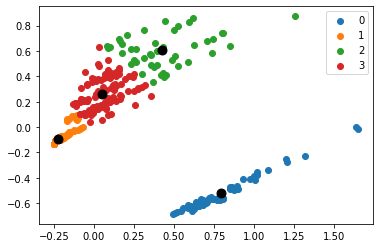

In [11]:
import matplotlib.pyplot as plt
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [12]:
# Adding Cluster label as a column in the dataframe for comparison
df_tmp = pd.DataFrame()
df_tmp['label'] = pd.Series(label)

df_tmp['id'] = df_player.reset_index()['id']
df_tmp = df_tmp.set_index('id')
df_tmp

df_player['label'] = df_tmp['label']
df_player

,stats.goals_scored,stats.assists,stats.clean_sheets,stats.goals_conceded,stats.penalties_saved,stats.penalties_missed,stats.saves,stats.bps,stats.influence,stats.creativity,stats.threat,stats.ict_index,type,label
id,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.4,0.0,0.0,0.25,0.180328,0.111111,0.0,0.0,0.059701,0.25,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.25,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.75,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,1.00,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,1.00,1
551,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.75,1
552,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.75,1


In [13]:
df_player[df_player['label'] == 1]

,stats.goals_scored,stats.assists,stats.clean_sheets,stats.goals_conceded,stats.penalties_saved,stats.penalties_missed,stats.saves,stats.bps,stats.influence,stats.creativity,stats.threat,stats.ict_index,type,label
id,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,1
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1
551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,1
552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,1


In [14]:
# Type of players in each clusters and their numbers.
df_player = df_player.replace({
    'type' : {1: 'GKP' , 2 : 'DEF', 3 : 'MID', 4: 'FWD'}
})
for i in range(4):
    print(i)
    print(df_player[df_player['label'] == i]['type'].value_counts())

0
0.75    27
0.5     21
GKP      5
0.25     5
Name: type, dtype: int64
1
0.75    129
0.5     107
GKP      51
0.25     38
Name: type, dtype: int64
2
0.75    22
0.5     13
GKP     10
0.25     2
Name: type, dtype: int64
3
0.75    55
0.5     48
0.25    12
GKP      9
Name: type, dtype: int64
